In [2]:
# The plan for today is to narrow down the results from yesterday!
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

L = 50
SIZE = 50**2

In [42]:
# As before, first let's reproduce the BKT transition and check winding number frequency distribution!
# For K=0, J=1.5, we are at very low temperature, so we do not expect many vortices. Thus, we expect 
# mostly straight lines, that eventually decay back to nu=0 (question: if vortices and antivortices appear
# in pairs, why do we expect to eventually find the system in nu=0? shouldn't we find ourselves equally
# distributed between nu=0 and nu=2?)
bkt_low_temp = np.transpose(np.loadtxt('J_2.0.txt'))

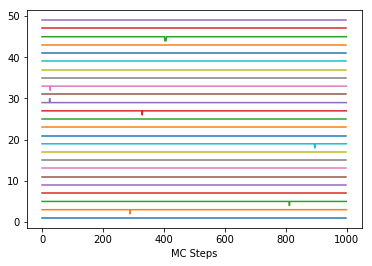

In [52]:
# Here, we plot the winding number at every timestep (i.e. after every spin flip)
for row in xrange(len(bkt_low_temp)-25):
    plt.plot(range(len(bkt_low_temp[row, ::L])), bkt_low_temp[row, ::L] + 2 * row)
plt.xlabel('MC Steps')
plt.show()

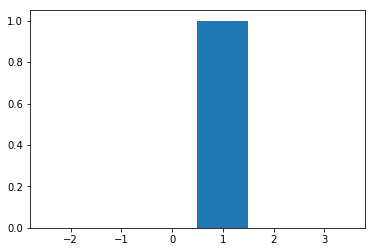

In [50]:
# If we histogram frequencies, we find a large peak at 1. It isn't balanced in +/- 1 though, 
# since the system appears to be more likely to go to the ground state. This is okay, since 
# it means that the negative vortex is likely to become deconfined and cross the boundary...
# but neither case is too likely anyway, so maybe there's no statistical difference...
cont_bkt_low_temp = bkt_low_temp[0]
for row in bkt_low_temp[1:]:
    cont_bkt_low_temp = np.append(cont_bkt_low_temp, row)
plt.hist(cont_bkt_low_temp, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

In [12]:
# Okay, now let's do the same for below J_c (that is, high temperature)
bkt_high_temp = np.transpose(np.loadtxt('J_1.0.txt'))

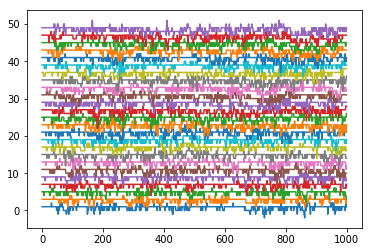

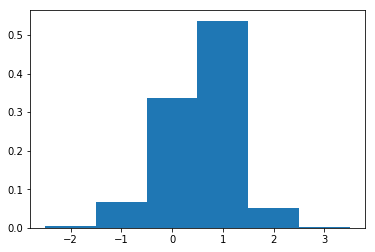

In [59]:
for row in xrange(len(bkt_high_temp)-25):
    plt.plot(range(len(bkt_high_temp[row, ::L])), bkt_high_temp[row, ::L] + 2 * row)
plt.show()

cont_bkt_high_temp = bkt_high_temp[0]
for row in bkt_high_temp[1:]:
    cont_bkt_high_temp = np.append(cont_bkt_high_temp, row)
plt.hist(cont_bkt_high_temp, bins=[-2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

# Some commentary: the first plot doesn't really tell us much, but the second one shows that we haven't
# reached equilibrium yet, since the system is still more likely to have nu=1

In [56]:
# We can check to see that this is still the case if we lower the value of J such that 
# we are at very high temperature. Now, we expect to see a balanced histogram centered at 0
bkt_very_high_temp = np.transpose(np.loadtxt('J_0.7.txt'))

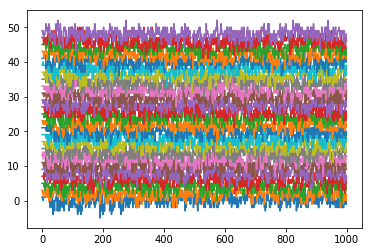

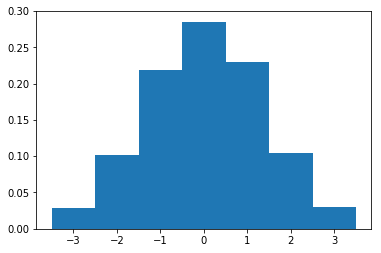

In [66]:
for row in xrange(len(bkt_very_high_temp)-25):
    plt.plot(range(len(bkt_very_high_temp[row, ::L])), bkt_very_high_temp[row, ::L] + 2 * row)
plt.show()

cont_bkt_very_high_temp = bkt_very_high_temp[0]
for row in bkt_very_high_temp[1:]:
    cont_bkt_very_high_temp = np.append(cont_bkt_very_high_temp, row)
plt.hist(cont_bkt_very_high_temp, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
plt.show()

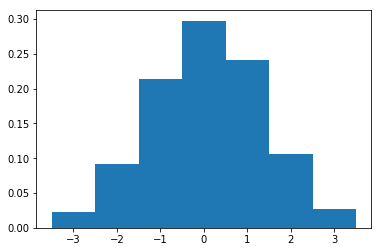

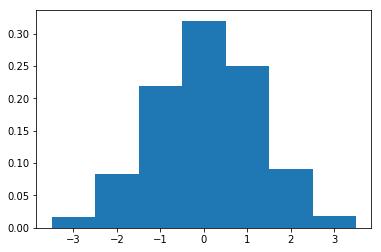

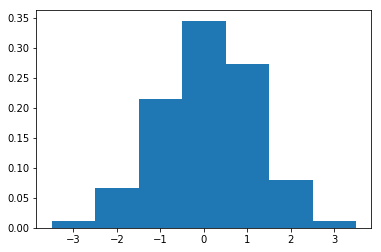

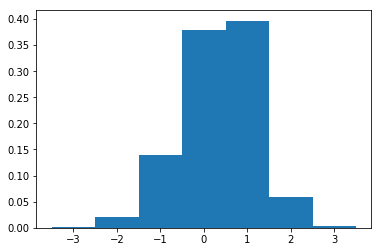

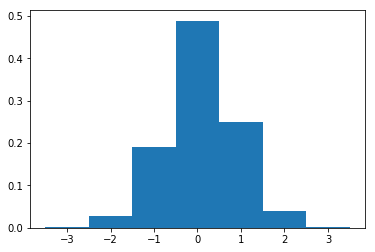

In [86]:
# Now, let's try keeping J=0.7 fixed and slowly varying K
flist = ['J_0.7_K_0.1.txt', 'J_0.7_K_0.2.txt', 'J_0.7_K_0.3.txt', 'J_0.7_K_0.5.txt', 'J_0.7_K_0.5_long.txt']

for f in flist:
    small_k = np.transpose(np.loadtxt(f))
    cont_small_k = small_k[0]
    for row in small_k[1:]:
        # Throw away some of the initial data
        cont_small_k = np.append(cont_small_k, row[:100*SIZE])
    plt.hist(cont_small_k, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5], density=True)
    plt.show()

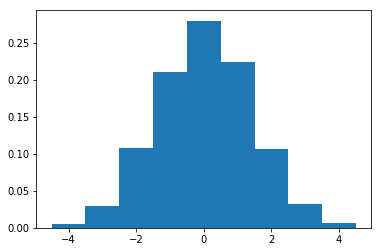

In [82]:
# Maybe I'm making an unfair comparison here? Let's try comparing the final histogram (nmc=5000, with the first
# 100 mc steps thrown away) to the same thing with K=0...
bkt_high_temp_long = np.transpose(np.loadtxt('J_0.7_long.txt'))
cont_bkt_high_temp_long = bkt_high_temp_long[0]
for row in bkt_high_temp_long[1:]:
    cont_bkt_high_temp_long = np.append(cont_bkt_high_temp_long, row[100*SIZE:])
plt.hist(cont_bkt_high_temp_long, bins=[-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5], density=True)
plt.show()

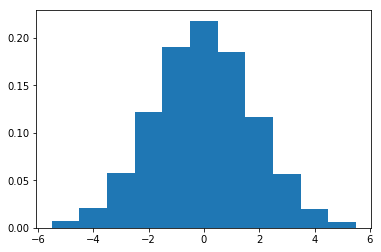

In [83]:
bkt_high_temp_long_sgn = np.transpose(np.loadtxt('J_0.7_K_-1.2_long.txt'))
cont_bkt_high_temp_long_sgn = bkt_high_temp_long_sgn[0]
for row in bkt_high_temp_long_sgn[1:]:
    cont_bkt_high_temp_long_sgn = np.append(cont_bkt_high_temp_long_sgn, row[100*SIZE:])
plt.hist(cont_bkt_high_temp_long_sgn, bins=[-5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], density=True)
plt.show()

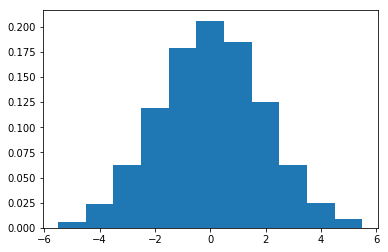

In [87]:
# I'm curious to see whether I just introduced this bug... let's try reverting to the old indexing 
# structure and check if we reproduce this plot!
bkt_high_temp_long_sgn = np.transpose(np.loadtxt('J_0.7_K_-2.0_long_check.txt'))
cont_bkt_high_temp_long_sgn = bkt_high_temp_long_sgn[0]
for row in bkt_high_temp_long_sgn[1:]:
    cont_bkt_high_temp_long_sgn = np.append(cont_bkt_high_temp_long_sgn, row[100*SIZE:])
plt.hist(cont_bkt_high_temp_long_sgn, bins=[-5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], density=True)
plt.show()